In [399]:
# importando bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt

In [400]:
# leitura do arquivo csv e panorama geral do dataset
df_geral = pd.read_csv('/content/Startups in 2021 end.csv')
print(f'Este dataset possui {df_geral.shape[0]} linhas e {df_geral.shape[1]} colunas:\n')
df_geral

Este dataset possui 936 linhas e 8 colunas:



,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


In [401]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [402]:
# verificando valores NULL
df_geral.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [403]:
# apagando  as colunas Unnamed: 0 e Select Investors
df_geral = df_geral.drop(columns=['Unnamed: 0', 'Select Investors'])
df_geral

,Company,Valuation ($B),Date Joined,Country,City,Industry
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services
...,...,...,...,...,...,...
931,YipitData,$1,12/6/2021,United States,New York,Internet software & services
932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence
933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics
934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity


In [404]:
# retirando o $ da coluna Valuation e convertendo ela para um tipo numérico
df_geral['Valuation ($B)'] = pd.to_numeric(df_geral['Valuation ($B)'].apply( lambda linha: linha.replace('$', ' ') ) )
df_geral['Valuation ($B)']

0      140.0
1      100.3
2       95.0
3       45.6
4       40.0
       ...  
931      1.0
932      1.0
933      1.0
934      1.0
935      1.0
Name: Valuation ($B), Length: 936, dtype: float64

In [405]:
# estatísticas de Valuation
df_geral['Valuation ($B)'].describe()

count    936.000000
mean       3.281154
std        7.473179
min        1.000000
25%        1.050000
50%        1.600000
75%        3.000000
max      140.000000
Name: Valuation ($B), dtype: float64

In [406]:
# todos os paises 
df_geral['Country'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia',
       'United States,', 'Indonesia,'], dtype=object)

In [407]:
# os 10 países com mais unicórnio em tabela
country = df_geral['Country']
pd.DataFrame(country.value_counts()).head(10)

,Country
United States,477
China,169
India,51
United Kingdom,37
Germany,23
Israel,21
France,19
Canada,15
Brazil,15
South Korea,11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

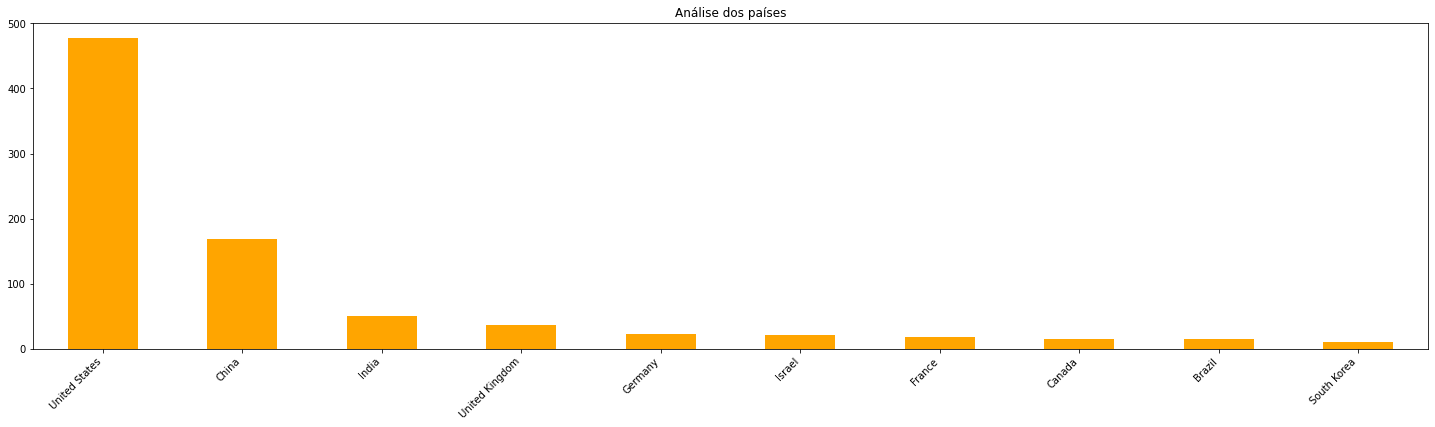

In [408]:
# os 10 países com mais unicórnios
plt.figure(figsize=[25, 6])
plt.title('Análise dos países')
country.value_counts().head(10).plot.bar(color = '#ffa500');
plt.xticks(rotation = 45, ha='right')

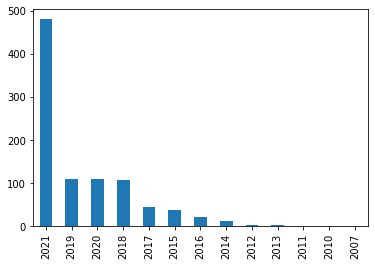

In [409]:
# filtrando a coluna Date Joined buscando apenas o ano
data_geral = df_geral['Date Joined'].str[-4:]
data_geral.value_counts().plot.bar()

In [410]:
pd.DataFrame(data_geral.value_counts())

,Date Joined
2021,480
2019,110
2020,110
2018,107
2017,46
2015,37
2016,22
2014,13
2012,4
2013,3


In [411]:
# do dataset, buscando apenas informações sobre o Brasil
brasil_geral = df_geral[df_geral['Country']== 'Brazil']
brasil_geral

,Company,Valuation ($B),Date Joined,Country,City,Industry
8,Nubank,30.00,3/1/2018,Brazil,Sao Paulo,Fintech
111,QuintoAndar,5.10,9/9/2019,Brazil,Campinas,E-commerce & direct-to-consumer
112,C6 Bank,5.05,12/2/2020,Brazil,Sao Paulo,Fintech
223,Nuvemshop,3.10,8/17/2021,Brazil,Sao Paulo,E-commerce & direct-to-consumer
233,Wildlife Studios,3.00,12/5/2019,Brazil,Sao Paulo,Other
264,Loft,2.90,1/3/2020,Brazil,Sao Paulo,E-commerce & direct-to-consumer
338,1,2.15,9/8/2021,Brazil,Sao Paulo,Fintech
385,Loggi,2.00,6/5/2019,Brazil,Sao Paulo,"Supply chain, logistics, & delivery"
430,Creditas,1.75,12/18/2020,Brazil,Sao Paulo,Fintech
744,Movile,1.00,7/12/2018,Brazil,Sao Paulo,Mobile & telecommunications


In [412]:
brasil_geral.describe()

,Valuation ($B)
count,15.000000
mean,4.070000
std,7.308234
min,1.000000
25%,1.000000
50%,2.000000
75%,3.050000
max,30.000000


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

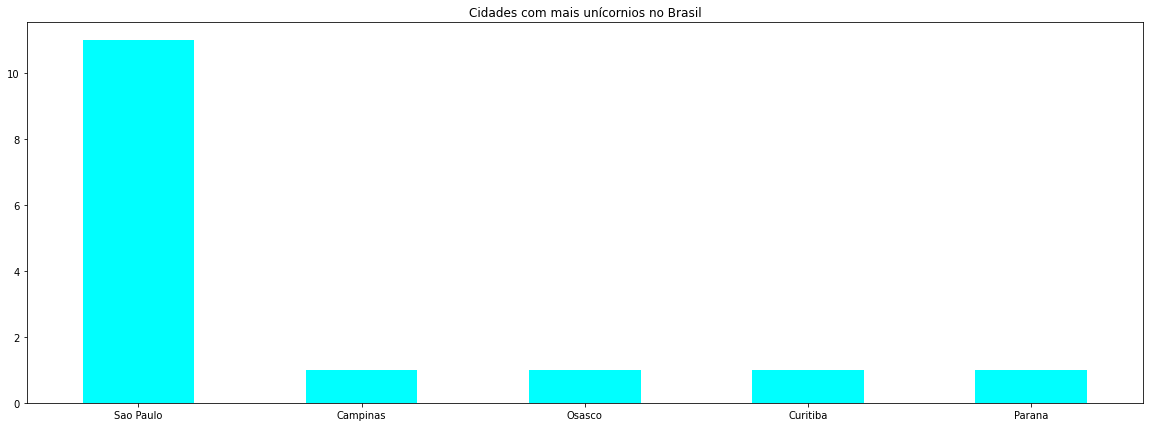

In [413]:
plt.figure(figsize=[20,7])
plt.title('Cidades com mais unícornios no Brasil')

brasil_geral['City'].value_counts().plot.bar(color = '#00ffff');
plt.xticks(rotation = 360)
